## Limpeza e Tratamento de Dados

### Atividade com intuito de realizar a prática de conceitos básicos de limpeza e tratamento de dados

**Condições que precisam ser atendidas:**

* Aparência: sol, chuva, nublado
* Temperatura: -130 ~ 130°F
* Umidade: 0 ~ 100
* Jogar: sim/não

* Tratar valores NAs

In [1]:
#Importando bibliotecas necessárias

import pandas as pd
import statistics as sts
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importando base de dados e visualizado os primeiros itens

dataset = pd.read_csv("../data/tempo.csv", sep=";")

dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [3]:
# Explorando dados categoricos
# Aparencia

group = dataset.groupby(['Aparencia']).size()
group

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

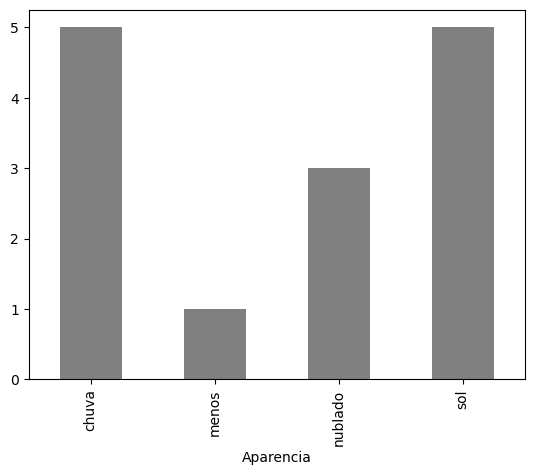

In [4]:
group.plot.bar(color = 'gray')

In [5]:
# Vento

group = dataset.groupby(['Vento']).size()
group

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<Axes: xlabel='Vento'>

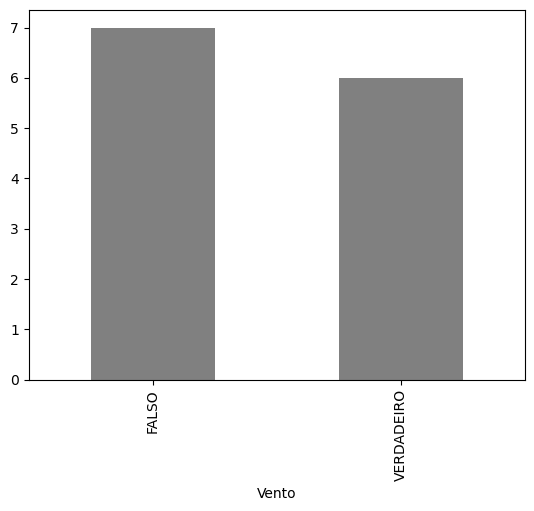

In [6]:
group.plot.bar(color='gray')

In [7]:
# Jogar

group = dataset.groupby(['Jogar']).size()
group

Jogar
nao    5
sim    9
dtype: int64

<Axes: xlabel='Jogar'>

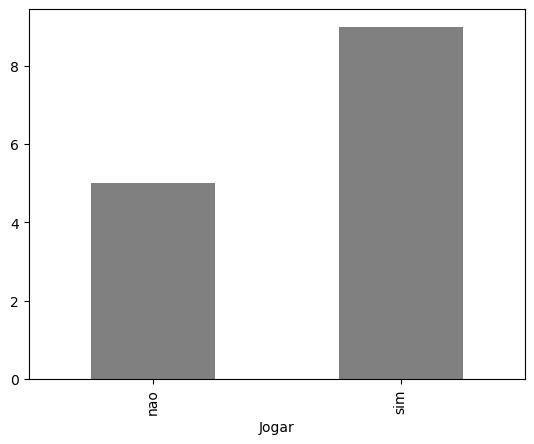

In [8]:
group.plot.bar(color ='gray')

In [9]:
#Explorando colunas númericas
#Umidade

dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

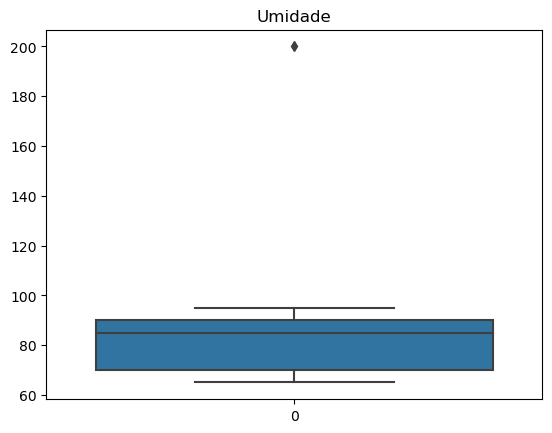

In [10]:
sns.boxplot(dataset['Umidade']).set_title('Umidade')

Text(0.5, 1.0, 'Umidade')

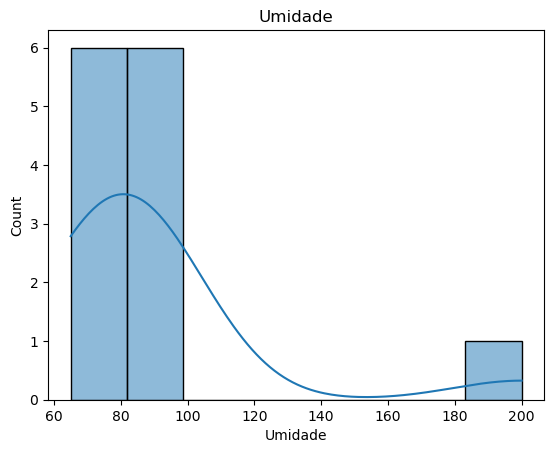

In [11]:
sns.histplot(dataset['Umidade'], kde= True).set_title('Umidade')

In [12]:
#Temperatura

dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

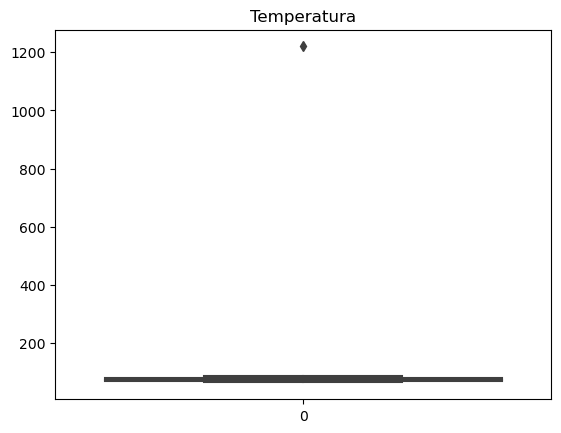

In [13]:
sns.boxplot(dataset['Temperatura']).set_title('Temperatura')

Text(0.5, 1.0, 'Temperatura')

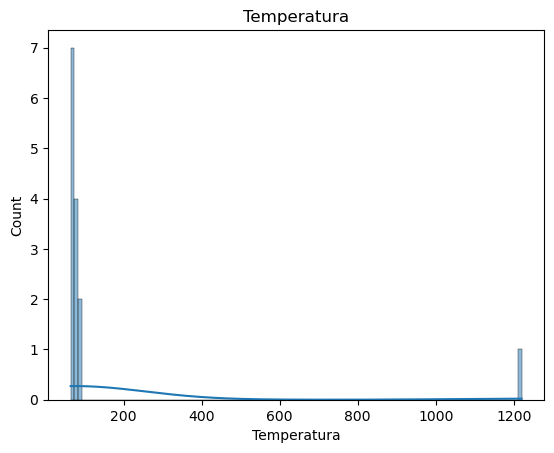

In [14]:
sns.histplot(dataset['Temperatura'], kde= True).set_title('Temperatura')

In [15]:
#Procurando valores NAN

dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [16]:
#visualizando valor invalido na aparência

group = dataset.groupby(['Aparencia']).size()
group

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [17]:
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = 'sol'
# Visualizando os resultados
group = dataset.groupby(['Aparencia']).size()
group

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [18]:
# Temperatura fora do domínio

dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [19]:
# Visualizar resgistro de temperatura fora do domínio
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130 )]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [20]:
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [21]:
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130), 'Temperatura'] = mediana

In [22]:
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [23]:
group = dataset.groupby(['Umidade']).size()
group

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

In [24]:
dataset['Umidade'].isnull().sum()

1

In [25]:
mediana = sts.median(dataset['Umidade'])
mediana

85.5

In [26]:
dataset['Umidade'].fillna(mediana, inplace= True)

In [27]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          1
Jogar          0
dtype: int64

In [28]:
# Visualizando valores fora do padrão
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade']>100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


In [29]:
# substituindo valor fora do padrao pela mediana
dataset.loc[(dataset['Umidade'] < 0)|(dataset['Umidade'] > 100), 'Umidade'] = mediana

In [30]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] >100 )]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [31]:
group = dataset.groupby(['Vento']).size()
group

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [32]:
dataset['Vento'].isnull().sum()

1

In [33]:
dataset['Vento'].fillna('FALSO', inplace=True)

In [34]:
dataset['Vento'].isnull().sum()

0

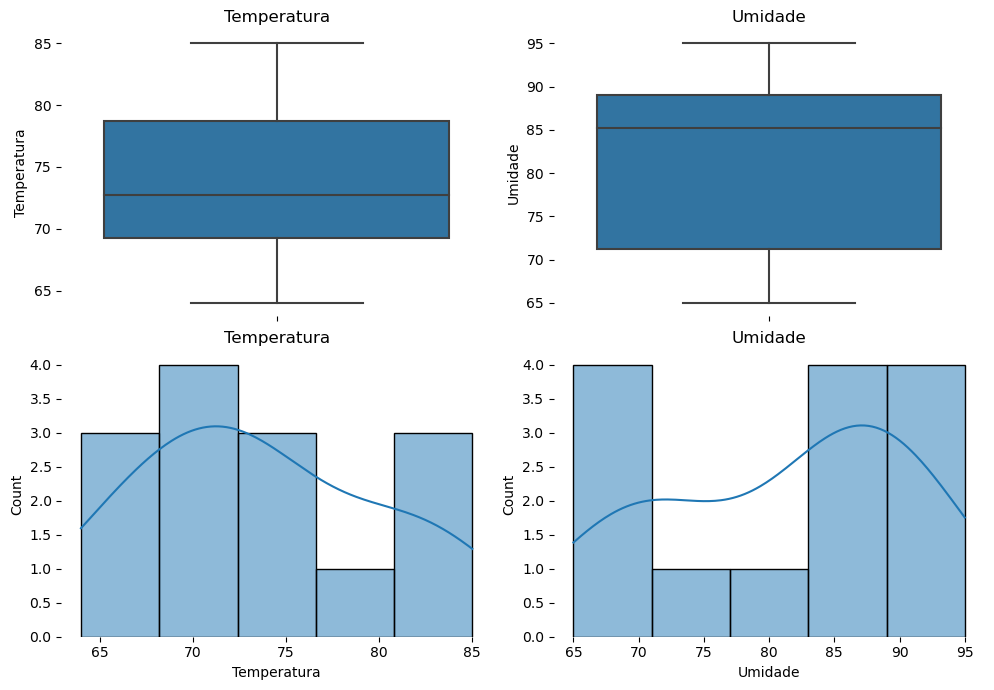

In [35]:
fig, (axs1, axs2) = plt.subplots(2, 2, figsize=(10, 7))

sns.boxplot(data=dataset, x=None, y="Temperatura", ax=axs1[0])
sns.boxplot(data=dataset, x=None, y="Umidade", ax=axs1[1])
sns.histplot(data=dataset, kde=True , x="Temperatura", y=None, ax=axs2[0])
sns.histplot(data=dataset, kde=True , x="Umidade", y=None, ax=axs2[1])


axs1[0].set_title('Temperatura')
axs1[1].set_title('Umidade')
axs2[0].set_title('Temperatura')
axs2[1].set_title('Umidade')

sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.show()

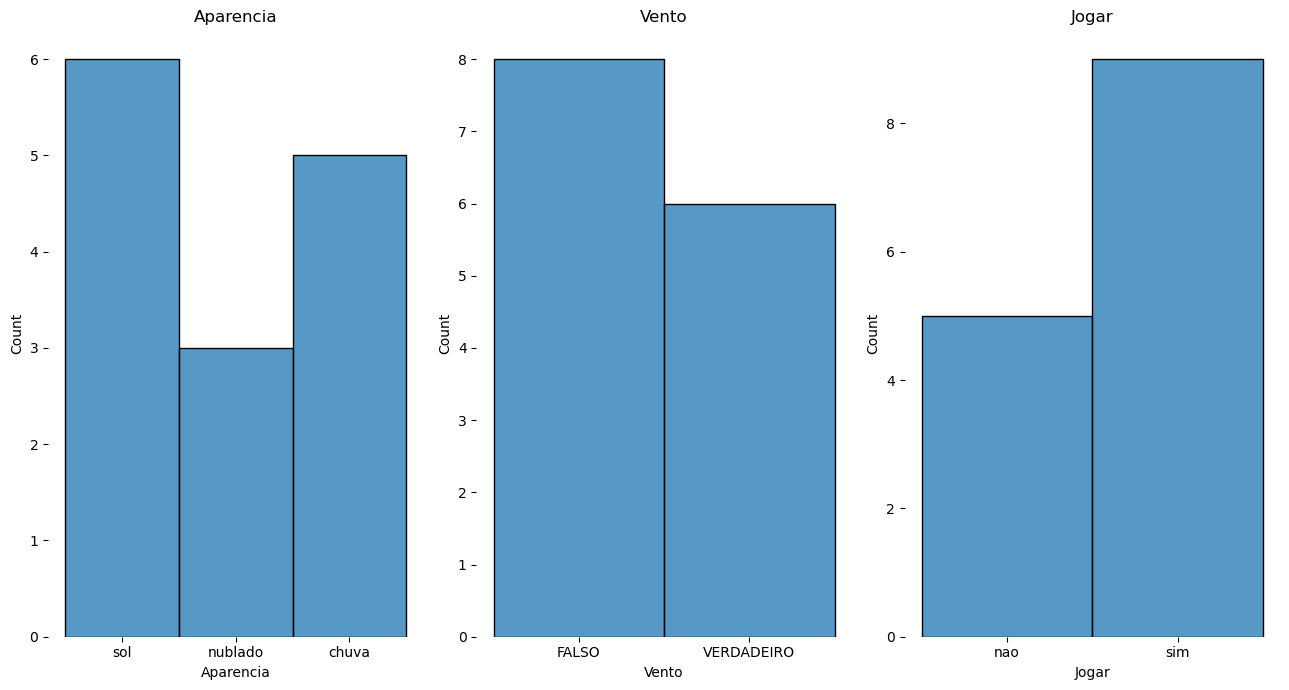

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(13, 7))

sns.histplot(data=dataset, x='Aparencia', y=None, ax=axs[0])
sns.histplot(data=dataset, x='Vento', y=None, ax=axs[1])
sns.histplot(data=dataset, x='Jogar', y=None,ax=axs[2])

axs[0].set_title('Aparencia')
axs[1].set_title('Vento')
axs[2].set_title('Jogar')

sns.despine(left=True,bottom=True)
plt.tight_layout() 

plt.show()